In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [6]:
wine = datasets.load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names) # convert breast cancer data to Dataframe
df["target"]=wine.target

In [7]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [9]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [10]:
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

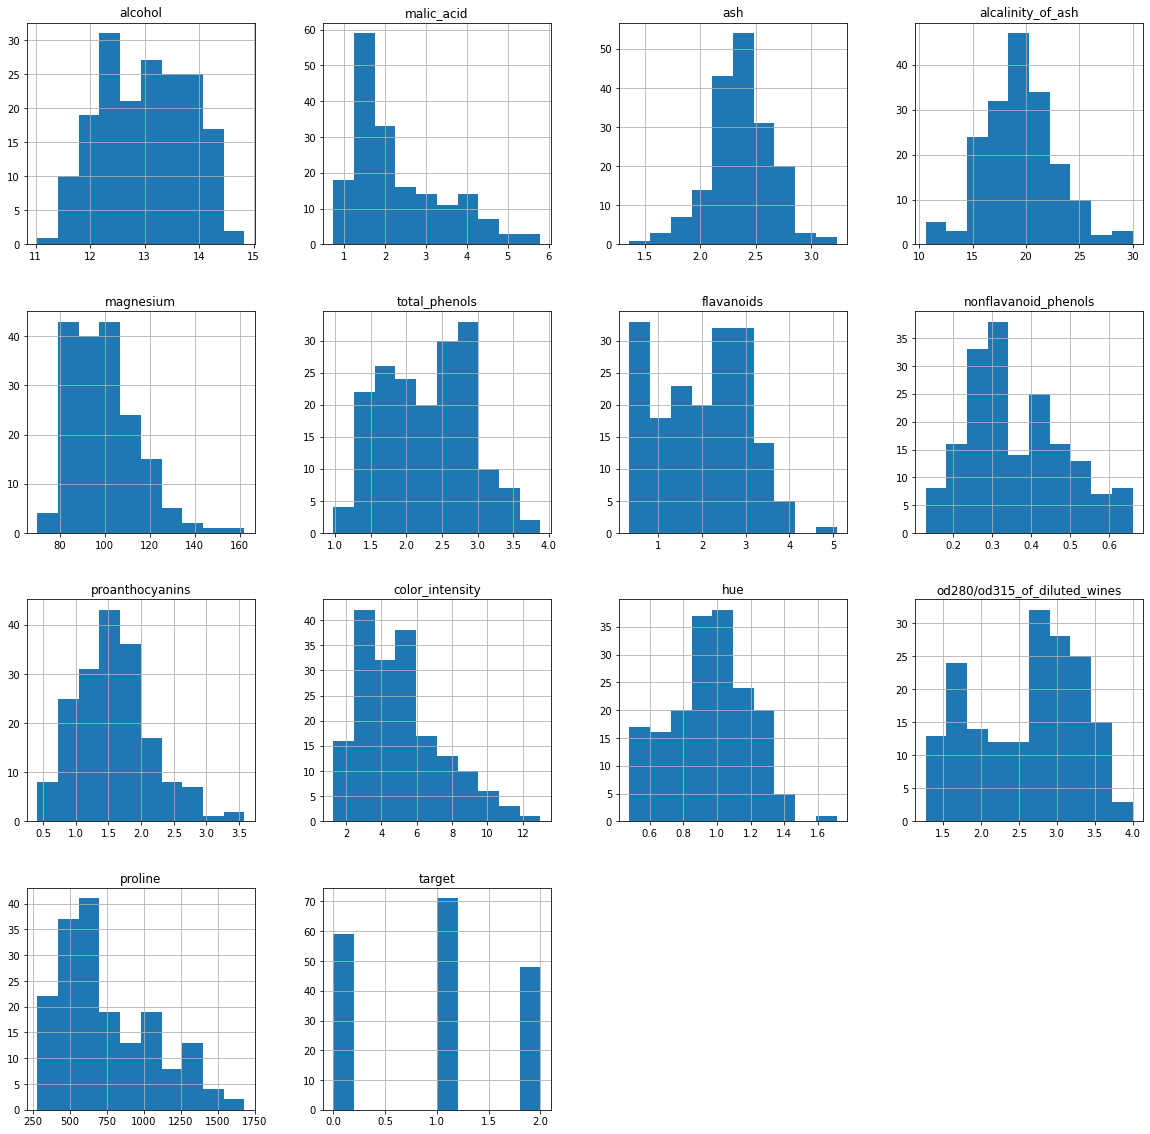

In [11]:
plt.rcParams["figure.figsize"] = (20,20)
df.hist()
plt.show()

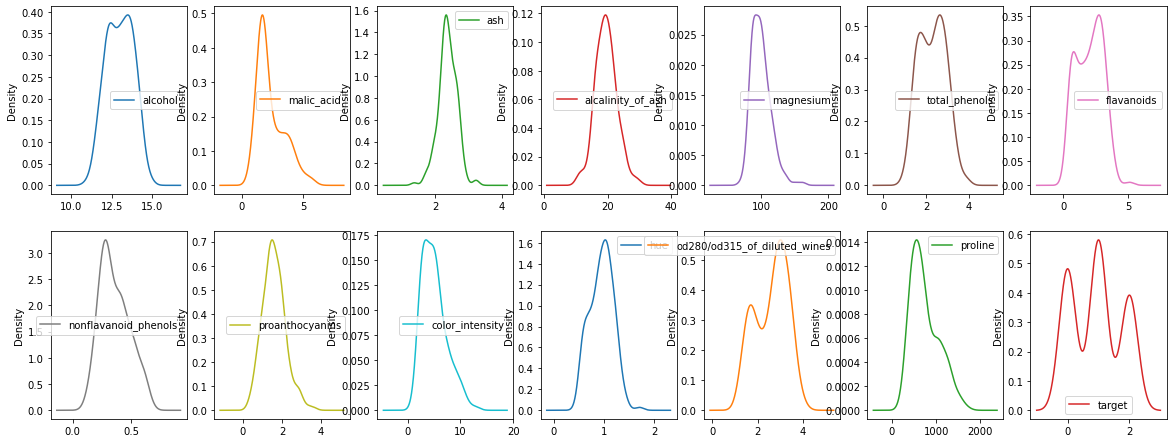

In [12]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False)
plt.show()

In [13]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [14]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [15]:
duplicate_values = df[df.duplicated()]
duplicate_values

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


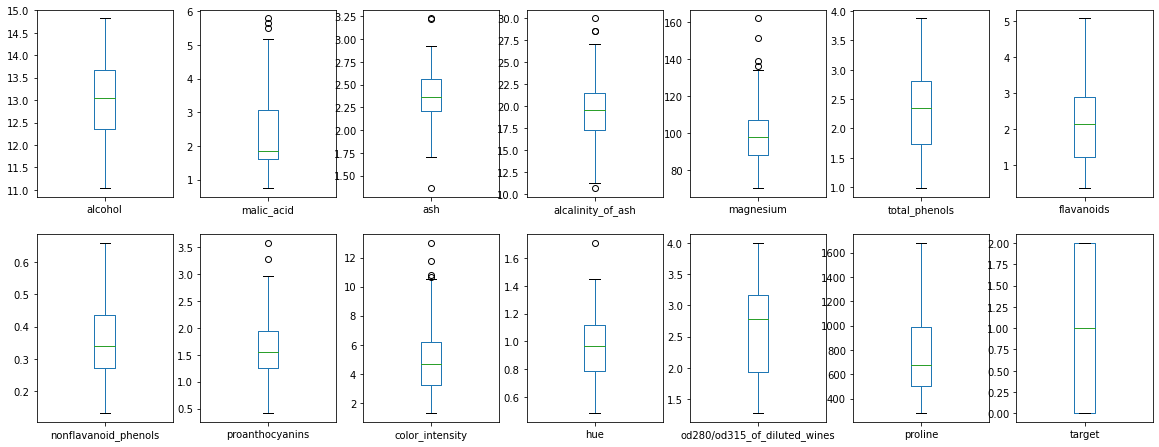

In [16]:
df.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False)
plt.show()

In [17]:
correlation = df.corr(method='spearman')
columns = correlation.nlargest(5,'target').index
columns

Index(['target', 'alcalinity_of_ash', 'nonflavanoid_phenols', 'malic_acid',
       'color_intensity'],
      dtype='object')

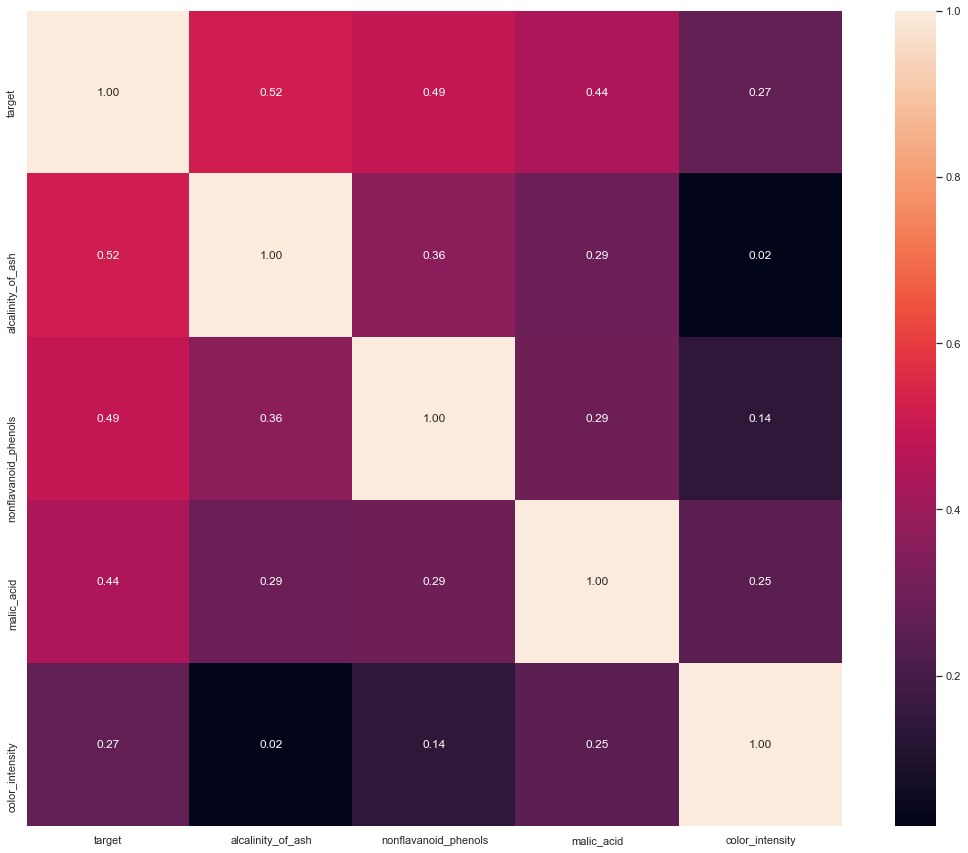

In [18]:
f = plt.figure(figsize=(19, 15))
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

##### Seperate dataset into features and output 

In [24]:
values = df.values

X = values[:,0:13]
Y = values[:,13]

##### Feature Scaling 

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialize scaler 
scaler.fit(X) # learn the necessary info from data 
X_scaled  = scaler.fit_transform(X) # apply scaling 

In [26]:
df_scaled = pd.DataFrame(X_scaled)

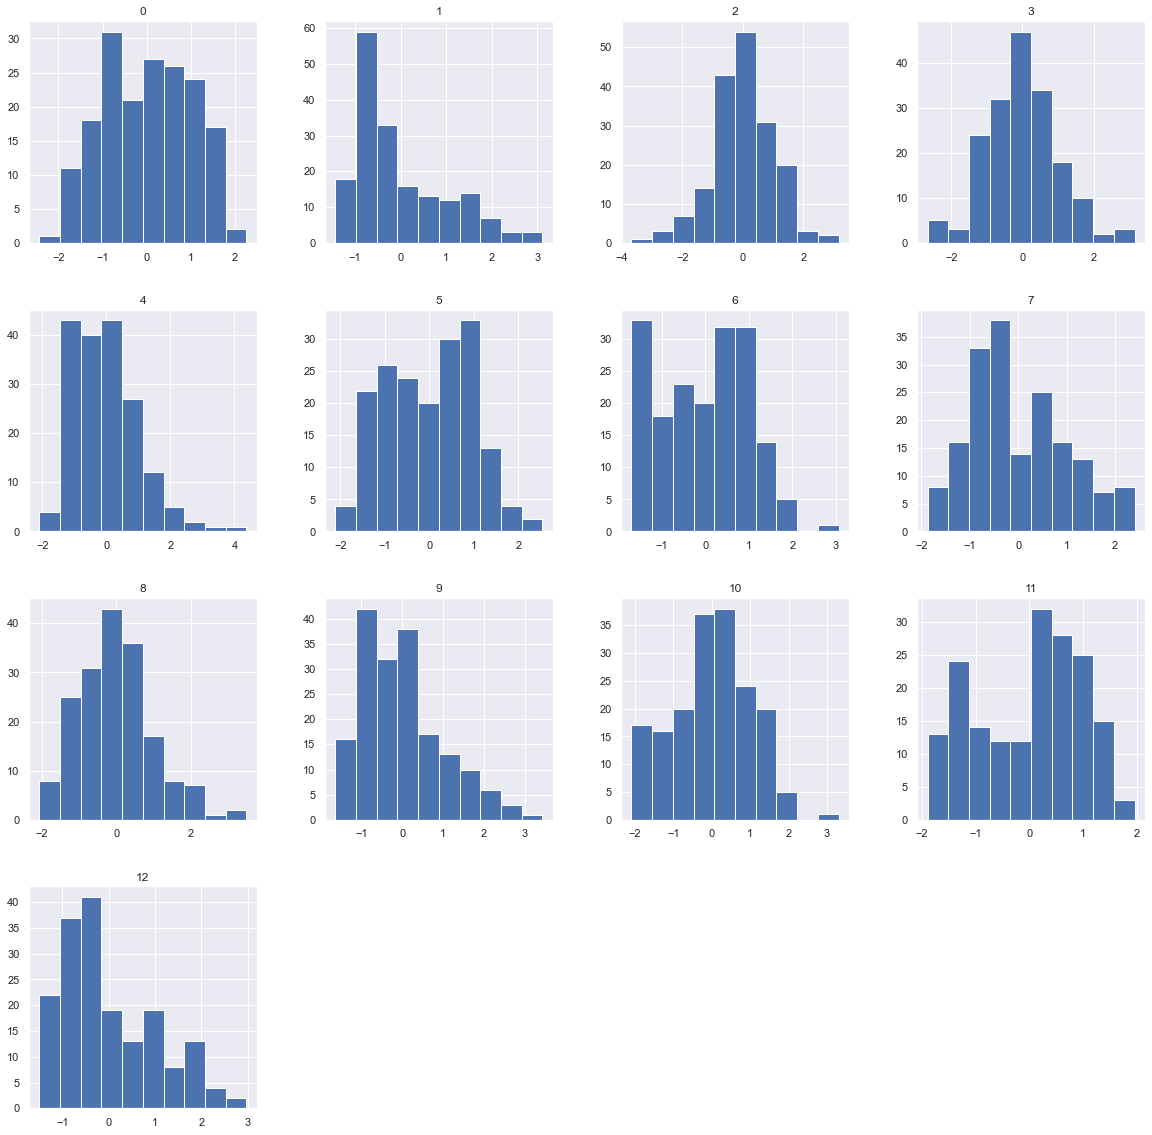

In [27]:
plt.rcParams["figure.figsize"] = (20,20)
df_scaled.hist()
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_scaled, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


 LR: 0.987958 (+/- 0.022741)
LDA: 0.989599 (+/- 0.022268)
kNN: 0.969720 (+/- 0.035930)
 DT: 0.893856 (+/- 0.084221)
 NB: 0.979032 (+/- 0.033058)
SVM: 0.960029 (+/- 0.034670)
 RF: 0.980333 (+/- 0.028430)
 GB: 0.941681 (+/- 0.050611)
XGB: 0.969199 (+/- 0.038694)
AdaBoost: 0.897697 (+/- 0.096802)
ANN: 0.981616 (+/- 0.029133)


In [29]:
def noise(X,noise=5):
    
    from noisify.recipes import human_error
    from noisify.recipes import machine_error

    combined_noise = machine_error(noise) + human_error(noise)
    X_noise = np.empty([X.shape[0], X.shape[1]])
    
    for i in range(X.shape[1]):
        col = X[:,i]
        nos = np.array(list(combined_noise(col)))
        X_noise[:,i] = nos
        
    return X_noise

In [30]:
X_noise = noise(X_scaled)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X_noise, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


 LR: 0.964527 (+/- 0.042980)
LDA: 0.964998 (+/- 0.037486)
kNN: 0.937841 (+/- 0.048018)
 DT: 0.836589 (+/- 0.071148)
 NB: 0.964061 (+/- 0.041886)
SVM: 0.967250 (+/- 0.045804)
 RF: 0.964870 (+/- 0.039696)
 GB: 0.934763 (+/- 0.062458)
XGB: 0.928854 (+/- 0.059850)
AdaBoost: 0.776674 (+/- 0.100569)
ANN: 0.966306 (+/- 0.036119)


In [32]:
## Or with another way 

In [33]:
def noise(X,noise=5):
    
    from noisify.recipes import human_error
    from noisify.recipes import machine_error

    combined_noise = machine_error(noise) + human_error(noise)
    X_noise = np.empty([X.shape[0], X.shape[1]])
    
    for i in range(X.shape[1]):
        col = X[:,i]
        nos = np.array(list(combined_noise(col)))
        X_noise[:,i] = nos
        
    return X_noise

In [34]:
X_n = noise(X_scaled)

In [35]:
X_n

array([[ 1.18116542, -0.69650779,  0.26349452, ...,  0.26625918,
         1.48342434,  0.59918899],
       [-0.87626472, -0.31255678, -0.09212509, ..., -0.00234384,
         0.74440631,  0.74808719],
       [-0.05686606, -0.04663546,  0.56743795, ..., -1.26065515,
        -0.3043016 ,  1.56938399],
       ...,
       [ 0.43238312,  0.83955936, -0.81214841, ..., -1.28546719,
        -0.82300988,  0.90372243],
       [ 0.45896084,  0.93652999,  0.80448594, ..., -2.24566071,
        -1.74062682,  1.48517884],
       [ 1.07144603,  0.93652999,  1.29268129, ..., -1.20581523,
        -2.07792054, -0.26053905]])

In [36]:
X2 = X_n

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import f1_score # We choose f1 score because the data are unbalanced and f1 takes the combination of precision and recall



models = []
models.append(('LR',  LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(kernel="linear", gamma='auto')))
models.append(('RF',  RandomForestClassifier()))
models.append(('GB',  GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('AdaBoost',  AdaBoostClassifier()))
models.append(('ANN', MLPClassifier()))


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scoring = "f1_macro"

results = []
names   = []
for i, model in models:
    cv_results = cross_val_score(model, X2, Y, cv=cv, n_jobs=-1, scoring=scoring)
    results.append(cv_results)
    names.append(i)
    print("%03s: %f (+/- %f)" % (i, cv_results.mean(), cv_results.std()))


 LR: 0.951538 (+/- 0.046016)
LDA: 0.958175 (+/- 0.045905)
kNN: 0.946144 (+/- 0.041558)
 DT: 0.836065 (+/- 0.083610)
 NB: 0.952091 (+/- 0.045286)
SVM: 0.933387 (+/- 0.049836)
 RF: 0.943483 (+/- 0.045391)
 GB: 0.916616 (+/- 0.057820)
XGB: 0.933356 (+/- 0.052057)
AdaBoost: 0.800529 (+/- 0.109256)
ANN: 0.959276 (+/- 0.036673)
